In [0]:
# !pip list | grep -e fastai -e torch -e torchvision

In [0]:
# !pip install PyDrive

In [0]:
!curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# import os
# from pydrive.auth import GoogleAuth
# from pydrive.drive import GoogleDrive
# from google.colab import auth
# from oauth2client.client import GoogleCredentials

In [0]:
# auth.authenticate_user()
# gauth = GoogleAuth()
# gauth.credentials = GoogleCredentials.get_application_default()
# drive = GoogleDrive(gauth)

In [0]:
# download = drive.CreateFile({'id': '1TCjHoe5S_rWpQzxBu8o07YI_zGZ708ma'})
# download.GetContentFile('Data.zip')

In [0]:
# from zipfile import ZipFile
# file_name="Data.zip"
# with ZipFile(file_name,'r') as zip:
#   zip.extractall()
#   print('done')

In [0]:
from fastai import *
from fastai.collab import *
from fastai.vision import *
from fastai.metrics import accuracy
from random import seed

In [0]:
import numpy as np
import re
import pickle
import os
import glob
import pandas as pd
from google.colab import drive
import cv2
from PIL import Image
from pathlib import Path
import fastai
from fastai.vision import *
from fastai.vision.models import *
import torch

In [0]:
from PIL import Image
import numpy as np
import os
from random import shuffle,seed
import matplotlib.pyplot as plt

In [5]:
seed(20)
torch.manual_seed(50)

In [0]:
tfms = get_transforms(do_flip=True, 
                      flip_vert=False, 
                      max_rotate=30, 
                      max_zoom=0.5, 
                      max_lighting=0.2)
path = '/content/drive/My Drive/C1_CD/'


In [8]:
data_large = ImageDataBunch.from_folder(path, valid_pct=0.3, test='/content/drive/My Drive/C1_CD/test', ds_tfms=None)

You can deactivate this warning by passing `no_check=True`.


/usr/local/lib/python3.6/dist-packages/fastai/basic_data.py:272: UserWarning: It's not possible to collate samples of your dataset together in a batch.
Shapes of the inputs/targets:
[[torch.Size([3, 4032, 3024]), torch.Size([3, 3024, 4032]), torch.Size([3, 4272, 2848]), torch.Size([3, 1920, 1920]), torch.Size([3, 4272, 2848]), torch.Size([3, 159, 318]), torch.Size([3, 1836, 3264]), torch.Size([3, 4272, 2848]), torch.Size([3, 184, 275]), torch.Size([3, 183, 275]), torch.Size([3, 2848, 4272]), torch.Size([3, 2848, 4272]), torch.Size([3, 2062, 750]), torch.Size([3, 4272, 2848]), torch.Size([3, 183, 275]), torch.Size([3, 2848, 4272]), torch.Size([3, 1133, 850]), torch.Size([3, 4272, 2848]), torch.Size([3, 3072, 2304]), torch.Size([3, 183, 275]), torch.Size([3, 3456, 5184]), torch.Size([3, 1836, 3264]), torch.Size([3, 181, 279]), torch.Size([3, 1536, 2048]), torch.Size([3, 194, 259]), torch.Size([3, 148, 342]), torch.Size([3, 180, 180]), torch.Size([3, 1836, 3264]), torch.Size([3, 3456, 345

In [0]:
data_large = ImageDataBunch.from_folder(path, valid_pct=0.3, test='/content/drive/My Drive/C1_CD/test', ds_tfms=tfms, size=224).normalize(imagenet_stats)

In [19]:
data_large_stats()

NameError: ignored

In [0]:
data_large

ImageDataBunch;

Train: LabelList (614 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
stem_rust,stem_rust,stem_rust,stem_rust,stem_rust
Path: /content/drive/My Drive/C1_CD;

Valid: LabelList (262 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
leaf_rust,leaf_rust,leaf_rust,leaf_rust,stem_rust
Path: /content/drive/My Drive/C1_CD;

Test: LabelList (610 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: EmptyLabelList
,,,,
Path: /content/drive/My Drive/C1_CD

In [0]:
data_small = ImageDataBunch.from_folder(path, test='/content/drive/My Drive/C1_CD/test', ds_tfms=tfms, valid_pct=0.3, size=128).normalize(imagenet_stats)

In [0]:
data_small

ImageDataBunch;

Train: LabelList (613 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: CategoryList
stem_rust,stem_rust,stem_rust,stem_rust,stem_rust
Path: /content/drive/My Drive/C1_CD;

Valid: LabelList (262 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: CategoryList
leaf_rust,healthy_wheat,stem_rust,healthy_wheat,leaf_rust
Path: /content/drive/My Drive/C1_CD;

Test: LabelList (610 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: EmptyLabelList
,,,,
Path: /content/drive/My Drive/C1_CD

In [0]:
# test=(ImageList.from_folder('path/test'))

In [0]:
# learnn=load_learner('path/train',test=test)

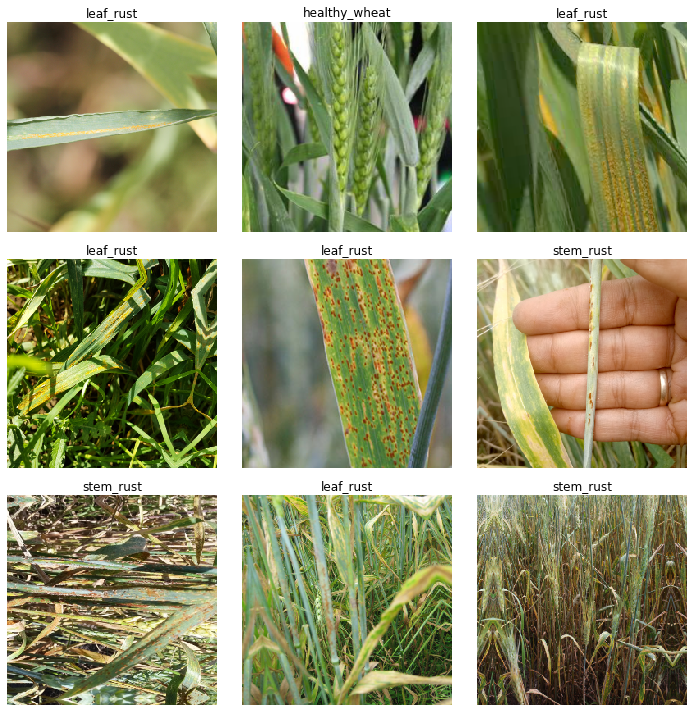

In [0]:
data_large.show_batch(rows=3, figsize=(10,10))

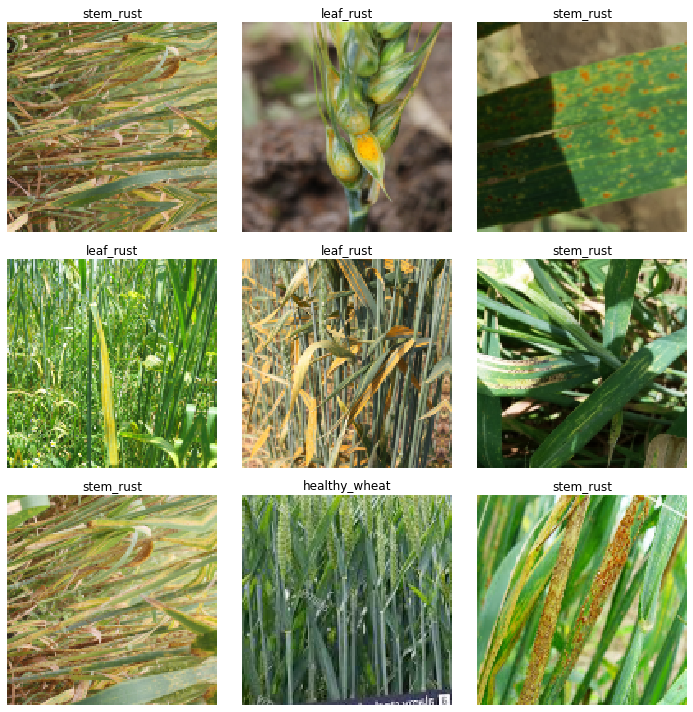

In [0]:
data_small.show_batch(rows=3, figsize=(10,10))

In [0]:
# my_trained_mod = create_cnn(data, models.resnet34, metrics=[error_rate, accuracy])
# my_trained_mod.fit_one_cycle(10)

In [0]:
learn_34 = cnn_learner(data_small, models.resnet34, metrics=[error_rate, accuracy])

In [0]:
learn_34.fit_one_cycle(5, max_lr=slice(1e-4,1e-2))


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.568691,0.829729,0.248092,0.751908,01:54
1,1.432856,1.043846,0.282443,0.717557,01:54
2,1.223348,1.032908,0.274809,0.725191,01:54
3,1.096242,0.845439,0.282443,0.717557,01:54
4,1.006678,0.763072,0.267176,0.732824,01:54


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


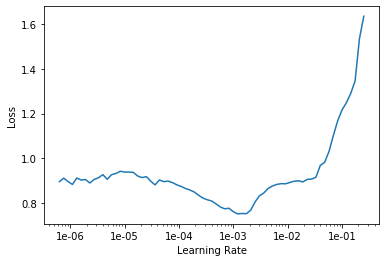

In [0]:
learn_34.lr_find()
learn_34.recorder.plot()

In [0]:
learn_34.save("resnet34_model_size128_stage1", return_path=True)
# learn.export()

PosixPath('/content/drive/My Drive/C1_CD/models/resnet34_model_size128_stage1.pth')

In [0]:
learn_34.data = data_large

In [0]:
learn_34.unfreeze()

In [0]:
learn_34.fit_one_cycle(5, max_lr=slice(1e-4,1e-2))

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.867388,0.694848,0.187023,0.812977,02:06
1,0.809068,1.046136,0.221374,0.778626,02:05
2,0.699887,2.844464,0.286260,0.713740,02:05
3,0.603153,1.120461,0.293893,0.706107,02:05
4,0.517414,0.660353,0.225191,0.774809,02:06


In [0]:
learn_34.save('resnet34-model-size256-stage1',return_path=True)

PosixPath('/content/drive/My Drive/C1_CD/models/resnet34-model-size256-stage1.pth')

In [0]:
learn = load_learner('/content/drive/My Drive/C1_CD', test=ImageList.from_folder('/content/drive/My Drive/C1_CD/test'))

In [0]:
interp = ClassificationInterpretation.from_learner(learn_34)

losses,idxs = interp.top_losses()

len(data_small.valid_ds)==len(losses)==len(idxs)

True

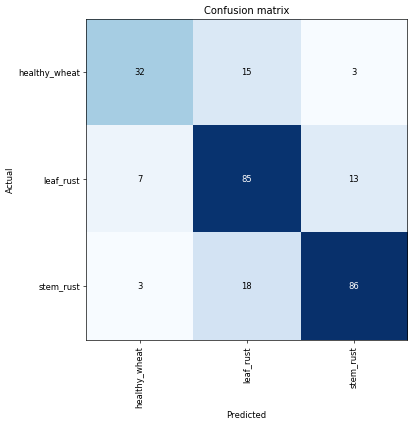

In [0]:
interp.plot_confusion_matrix(figsize=(7,7), dpi=60)

In [0]:
# test=(ImageList.from_folder('path/test'))
# learn=torch.load('/content/drive/My Drive/C1_CD/models/resnet34_model.pth')

In [0]:
preds_test, y_test = learn.get_preds(ds_type=DatasetType.Test)

In [0]:
preds_test.size()

torch.Size([610, 3])

In [0]:
sample = pd.read_csv('/content/drive/My Drive/C1_CD/sample_submission.csv')


In [0]:
submission = pd.DataFrame({'ID': [s.split('.')[0] for s in os.listdir('/content/drive/My Drive/C1_CD/test') ]})
for i, c in enumerate(learn.data.classes):
  submission[c] = preds_test[:,i]
submission = submission[['ID', 'leaf_rust', 'stem_rust', 'healthy_wheat']] # Get same order as sample sub
submission.head()

,ID,leaf_rust,stem_rust,healthy_wheat
0,WM6KLP,0.991477,0.005897,0.002626
1,G29JG9,0.999895,0.000097,0.000008
2,RHJXWS,0.996634,0.002176,0.001190
3,MKUVEU,0.765623,0.232488,0.001889
4,CVJKQ0,0.999543,0.000369,0.000088


In [0]:
submission = submission.set_index('ID')
submission = submission.reindex(index=sample['ID'])
submission = submission.reset_index()
submission.head()

,ID,leaf_rust,stem_rust,healthy_wheat
0,643083,0.846784,8.341809e-02,0.069798
1,008FWT,0.579256,4.070297e-01,0.013715
2,00AQXY,0.024005,9.742783e-01,0.001716
3,01OJZX,0.579256,4.070297e-01,0.013715
4,07OXKK,0.000005,1.604854e-07,0.999995


In [0]:
submission.to_csv('/content/drive/My Drive/C1_CD/submission6_Prog_resnet34_fastai.csv', index = False)